<a href="https://colab.research.google.com/github/marymuthee/covid_19/blob/main/SatCLIP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SatCLIP MODEL

In [ ]:
# we set up the folders and also mount google drive (mounting google drive ensures that the colab is connect
#with the drive and can be retrieved anytime)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### SETTING BASE FOLDER

In [ ]:
#we set a working directory path- where all the work/files will be saved
BASE="/content/drive/MyDrive/satCLIP_demo"

Sub-Folders


We will created 3 main sub-folders
1.   Data- All datasets (coordinates , EO ) will be stored
2.   Outputs-Where all the generated embeddinsg will be stored
3.   Checkpoints- Pretrained SatCLIP weights will be downloaded





In [ ]:
#we create sub-folders iside the folder we created above ()
import os
for d in [BASE, f'{BASE}/data', f'{BASE}/outputs', f'{BASE}/checkpoints']:
  os.makedirs(d, exist_ok=True)  #create the folder

In [ ]:
#to check if the path is created or which path I am using
print('the path is:', BASE)

the path is: /content/drive/MyDrive/satCLIP_demo


# **Installing Dependencies**

In [2]:
# 1Clean the current folder to avoid conflicts
!rm -rf /content/sample_data /content/.config /content/satclip

# 2Clone the SatCLIP repository into Colab
!git clone https://github.com/microsoft/satclip.git /content/satclip

Cloning into '/content/satclip'...
remote: Enumerating objects: 283, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 283 (delta 93), reused 87 (delta 87), pack-reused 173 (from 1)
Receiving objects: 100% (283/283), 30.77 MiB | 25.14 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [3]:
#install libraries
!pip install lightning --quiet
!pip install rasterio --quiet
!pip install torchgeo --quiet
!pip install basemap --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.5/828.5 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.2/825.2 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.6/507.6 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
#we call the libraries to confirm that they were successfully installed
import rasterio
import lightning
import torchgeo
from mpl_toolkits import basemap

# **PreTrained Models Usage**

In [5]:
#we will import
 #1.os -for cretaing folders if needed
 #2.torch-since satclip is built on pytorchh
 #3.huggingface- for check points or pretrained models

import sys, os
import torch
from huggingface_hub import hf_hub_download
sys.path.insert(0, '/content/satclip/satclip')  #adds this path to the paths
from load import get_satclip

From the above code . We aim to import the Satclip model into my colab .
   1. **The huggingface_hub **is a libary in python that  library allows one to interact with the Hugging Face Hub, used for storing pretrained models and datasets. The **hf_hub_download ** is the function that helps one in downloading the needed model/datasets.

   2. The **torch **is imported since satclip is builtunder the pyTorch library.

   3. To get the satclip model we use the** get_satclip **function which is under the **load.py** file in **satclip folder** inside the** satclip contents**




## Downloading PreTrained Model

In [6]:
#downloading the checkpoints ( this the model weights or parameters that were
#  used during the training)

#create a folder to store the model checkpoints
CKPT_DIR="/content/satclip_checkpoints"
os.makedirs(CKPT_DIR, exist_ok=True)

#selecing the device GPU/CPU
device="cuda" if torch.cuda.is_available() else "cpu"
print("device is:", device)

if device == "cuda":
    print("GPU:", torch.cuda.get_device_name(0))

#download the model
ckpt_path=hf_hub_download(
    repo_id="microsoft/SatCLIP-ViT16-L40",
    filename="satclip-vit16-l40.ckpt",
    local_dir=CKPT_DIR,
    #local_dir_use_symlinks=False,
)

device is: cuda
GPU: Tesla T4


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


satclip-vit16-l40.ckpt:   0%|          | 0.00/121M [00:00<?, ?B/s]

CPU is the Central Processing Unit which is the normal computer
brain.

---

Cuda(Compute Unified Device Architecture) is a technology that has been developed by NVIDIA that helps the PyTorch to communicate with the GPU. GPUs are more faster and convinient when dealing with large computation tasks as compared to the CPU , hence we opt to use it.

---

The code above basically tells the system to use GPU but if it is not available then it can use the CPU

## Loading the SatCLIP location encoder

In [7]:
from load import get_satclip

In [8]:
#loaidng the model and weights
model=get_satclip(ckpt_path , device=device)

#swith the model to inference/evaluation mode
model.eval()

using pretrained moco vit16
Downloading: "https://hf.co/torchgeo/vit_small_patch16_224_sentinel2_all_moco/resolve/1cb683f6c14739634cdfaaceb076529adf898c74/vit_small_patch16_224_sentinel2_all_moco-67c9032d.pth" to /root/.cache/torch/hub/checkpoints/vit_small_patch16_224_sentinel2_all_moco-67c9032d.pth


100%|██████████| 86.5M/86.5M [00:01<00:00, 74.6MB/s]


LocationEncoder(
  (posenc): SphericalHarmonics()
  (nnet): SirenNet(
    (layers): ModuleList(
      (0-1): 2 x Siren(
        (activation): Sine()
      )
    )
    (last_layer): Siren(
      (activation): Identity()
    )
  )
)

In [28]:
#define our location(s)

coords=[
    (36.8219, -1.2921),  # Nairobi
    (13.4049, 52.5200),  # Berlin
    (13.0550, 47.8095),  # Salzburg
]
print(coords)

[(36.8219, -1.2921), (13.4049, 52.52), (13.055, 47.8095)]


In [10]:
#convert the coordinates into a tensor
#tensor is a data structure in pyTorch that is used for storing numbers.
c=torch.tensor(coords, device=device, dtype=torch.float64)
print(c)

tensor([[36.8219, -1.2921],
        [13.4049, 52.5200],
        [13.0550, 47.8095]], device='cuda:0', dtype=torch.float64)


In [11]:
#run the location encoder to get the locations embeddings
model.eval()
with torch.no_grad():
  loc_emb=model(c).detach().cpu()

In [12]:
#inspecting the embeddings
print('embeddings shape:', loc_emb.shape)
print(loc_emb[0][:10])  #prints the first 10 values

embeddings shape: torch.Size([3, 256])
tensor([ 1.1050,  3.7243,  2.2846, -2.3412,  1.9842, -1.1480,  0.5682, -0.7850,
        -3.0897,  5.8691], dtype=torch.float64)


## Importing The Embeddings

In [13]:
import pandas as pd
import numpy as np

In [15]:
#convert the embeddings (tensor) to an array
emb_array=loc_emb.numpy()
print(emb_array)

[[ 1.10503066e+00  3.72430396e+00  2.28459795e+00 -2.34120963e+00
   1.98420592e+00 -1.14795428e+00  5.68186484e-01 -7.84972395e-01
  -3.08967979e+00  5.86913260e+00 -1.11912528e-03  2.51650636e+00
  -2.73090476e+00  2.92923818e+00  2.34727983e+00 -4.86781872e+00
  -2.70638961e+00 -4.96525212e+00  1.48817148e+00 -2.69548424e+00
  -2.63000686e+00 -1.88886222e+00 -3.51069780e+00  2.39806030e+00
  -3.32135013e+00 -3.38736437e+00  2.19865016e+00 -5.42907757e+00
   1.01548612e+00 -1.18363119e+00  3.59177590e+00 -1.49023626e+00
  -6.34932026e-01 -1.51432825e-01 -3.65651751e+00 -3.07929010e+00
   2.88561074e+00  2.54052960e+00 -1.55889411e+00 -1.16482323e+00
   3.32832272e+00  4.22846207e+00  2.54368438e+00 -9.28094690e-02
   1.41659214e+00 -1.38674717e+00 -4.04519072e+00  4.12245024e+00
   2.38017631e+00 -2.75915392e+00  2.95660054e+00 -2.51323738e-01
   3.63668092e-01  1.90252224e+00 -1.99753860e+00 -2.95669258e-01
   2.76158138e-01 -1.79551060e+00 -2.95936252e+00  3.65881193e+00
  -2.53780

In [19]:
#create column names for the emebeddings
cols = [f"e{i}" for i in range(emb_array.shape[1])]
print(cols)

['e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e53', 'e54', 'e55', 'e56', 'e57', 'e58', 'e59', 'e60', 'e61', 'e62', 'e63', 'e64', 'e65', 'e66', 'e67', 'e68', 'e69', 'e70', 'e71', 'e72', 'e73', 'e74', 'e75', 'e76', 'e77', 'e78', 'e79', 'e80', 'e81', 'e82', 'e83', 'e84', 'e85', 'e86', 'e87', 'e88', 'e89', 'e90', 'e91', 'e92', 'e93', 'e94', 'e95', 'e96', 'e97', 'e98', 'e99', 'e100', 'e101', 'e102', 'e103', 'e104', 'e105', 'e106', 'e107', 'e108', 'e109', 'e110', 'e111', 'e112', 'e113', 'e114', 'e115', 'e116', 'e117', 'e118', 'e119', 'e120', 'e121', 'e122', 'e123', 'e124', 'e125', 'e126', 'e127', 'e128', 'e129', 'e130', 'e131', 'e132', 'e133', 'e134', 'e135', 'e136', 'e137', 'e138

In [20]:
#create a data frame
df=pd.DataFrame(emb_array, columns=cols)
print(df)

         e0        e1        e2        e3        e4        e5        e6  \
0  1.105031  3.724304  2.284598 -2.341210  1.984206 -1.147954  0.568186   
1  4.827925  0.957358  1.031454  0.879580 -0.028788  1.904628  1.093967   
2  2.668330  2.398113  0.829102  1.230107  2.199515  1.451742  3.806698   

         e7        e8        e9  ...      e246      e247      e248      e249  \
0 -0.784972 -3.089680  5.869133  ... -2.016094 -4.695319 -0.131878 -4.455334   
1  1.559630  4.776008 -4.230935  ... -1.978325  2.504853 -3.337501  0.149929   
2  3.201811  1.672244 -1.171775  ... -3.528885 -3.510359 -1.608893 -5.341339   

       e250      e251      e252      e253      e254      e255  
0  4.787286  1.331530  0.770241  2.281812  6.623173 -3.939596  
1 -7.293286 -0.801327  6.245181  2.663891  0.948313  0.860865  
2 -5.441340 -4.303695  0.069309  3.825004  0.444699 -2.140761  

[3 rows x 256 columns]


In [21]:
#inserting latitude and longitudes
df.insert(0, "lat", [lat for (_, lat) in coords])
df.insert(0, "lon", [lon for (lon, _) in coords])
print(df)

       lon      lat        e0        e1        e2        e3        e4  \
0  36.8219  -1.2921  1.105031  3.724304  2.284598 -2.341210  1.984206   
1  13.4049  52.5200  4.827925  0.957358  1.031454  0.879580 -0.028788   
2  13.0550  47.8095  2.668330  2.398113  0.829102  1.230107  2.199515   

         e5        e6        e7  ...      e246      e247      e248      e249  \
0 -1.147954  0.568186 -0.784972  ... -2.016094 -4.695319 -0.131878 -4.455334   
1  1.904628  1.093967  1.559630  ... -1.978325  2.504853 -3.337501  0.149929   
2  1.451742  3.806698  3.201811  ... -3.528885 -3.510359 -1.608893 -5.341339   

       e250      e251      e252      e253      e254      e255  
0  4.787286  1.331530  0.770241  2.281812  6.623173 -3.939596  
1 -7.293286 -0.801327  6.245181  2.663891  0.948313  0.860865  
2 -5.441340 -4.303695  0.069309  3.825004  0.444699 -2.140761  

[3 rows x 258 columns]


In [25]:
#add names to the above data frame
df.insert(0, "name", names)

ValueError: cannot insert name, already exists

In [26]:
print(df)

       name      lon      lat        e0        e1        e2        e3  \
0   Nairobi  36.8219  -1.2921  1.105031  3.724304  2.284598 -2.341210   
1    Berlin  13.4049  52.5200  4.827925  0.957358  1.031454  0.879580   
2  Salzburg  13.0550  47.8095  2.668330  2.398113  0.829102  1.230107   

         e4        e5        e6  ...      e246      e247      e248      e249  \
0  1.984206 -1.147954  0.568186  ... -2.016094 -4.695319 -0.131878 -4.455334   
1 -0.028788  1.904628  1.093967  ... -1.978325  2.504853 -3.337501  0.149929   
2  2.199515  1.451742  3.806698  ... -3.528885 -3.510359 -1.608893 -5.341339   

       e250      e251      e252      e253      e254      e255  
0  4.787286  1.331530  0.770241  2.281812  6.623173 -3.939596  
1 -7.293286 -0.801327  6.245181  2.663891  0.948313  0.860865  
2 -5.441340 -4.303695  0.069309  3.825004  0.444699 -2.140761  

[3 rows x 259 columns]


In [30]:
#save the dataframe as csv
csv_path = "/content/location_embeddings.csv"

df.to_csv(csv_path, index=False)

In [34]:
# D8-1 — Cosine similarity matrix for your embeddings
import numpy as np

# emb: torch tensor [N, D]
E = loc_emb.numpy()                                  # to NumPy [N, D]
E_norm = E / np.linalg.norm(E, axis=1, keepdims=True)  # L2-normalize each row
sim = E_norm @ E_norm.T                          # cosine similarities in [-1, 1]

# Pretty print with names (assumes you made a `names` list earlier)
import pandas as pd
names = df["name"].tolist() if "name" in df.columns else [f"P{i}" for i in range(E.shape[0])]
sim_df = pd.DataFrame(sim, index=names, columns=names)
print("Cosine similarity (1 = very similar, 0 = orthogonal, -1 = opposite):")
sim_df


Cosine similarity (1 = very similar, 0 = orthogonal, -1 = opposite):


,Nairobi,Berlin,Salzburg
Nairobi,1.000000,-0.203515,-0.038001
Berlin,-0.203515,1.000000,0.553099
Salzburg,-0.038001,0.553099,1.000000


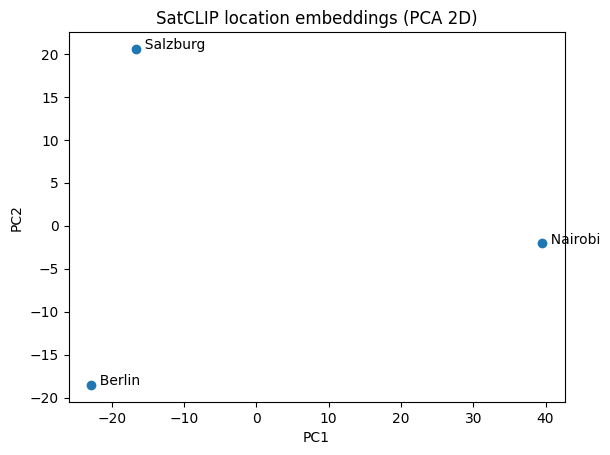

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

E =loc_emb.numpy()
names = df["name"].tolist() if "name" in df.columns else [f"P{i}" for i in range(E.shape[0])]

X2 = PCA(n_components=2, random_state=0).fit_transform(E)
plt.figure(); plt.scatter(X2[:,0], X2[:,1])
for i, label in enumerate(names):
    plt.text(X2[i,0], X2[i,1], "  " + label)
plt.title("SatCLIP location embeddings (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.show()

In [36]:
import numpy as np, pandas as pd

E = loc_emb.numpy()
E = E / np.linalg.norm(E, axis=1, keepdims=True)
S = E @ E.T  # cosine sim
np.fill_diagonal(S, -np.inf)  # ignore self-similarity

names = df["name"].tolist() if "name" in df.columns else [f"P{i}" for i in range(E.shape[0])]
best_idx = S.argmax(axis=1)
pd.DataFrame({"place": names, "nearest": [names[i] for i in best_idx], "sim": S[np.arange(len(names)), best_idx]})

,place,nearest,sim
0,Nairobi,Salzburg,-0.038001
1,Berlin,Salzburg,0.553099
2,Salzburg,Berlin,0.553099
